In [1]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
while os.getcwd().split('/')[-1] != 'imodels-experiments':
    os.chdir('..')

import viz

np.random.seed(0)

## recidivism

In [34]:
models_to_plot = ['cart', 'random_forest', 'gradient_boosting', 'grl', 'brs', 'skope_rules', 'rulefit']#, 'stbl_l1', 'stbl_l2']
results_to_plot = [
    pkl.load(open(f'results/stablerules/recidivism/cv/{model}_comparisons.pkl', 'rb'))
    for model in models_to_plot]

### rocauc

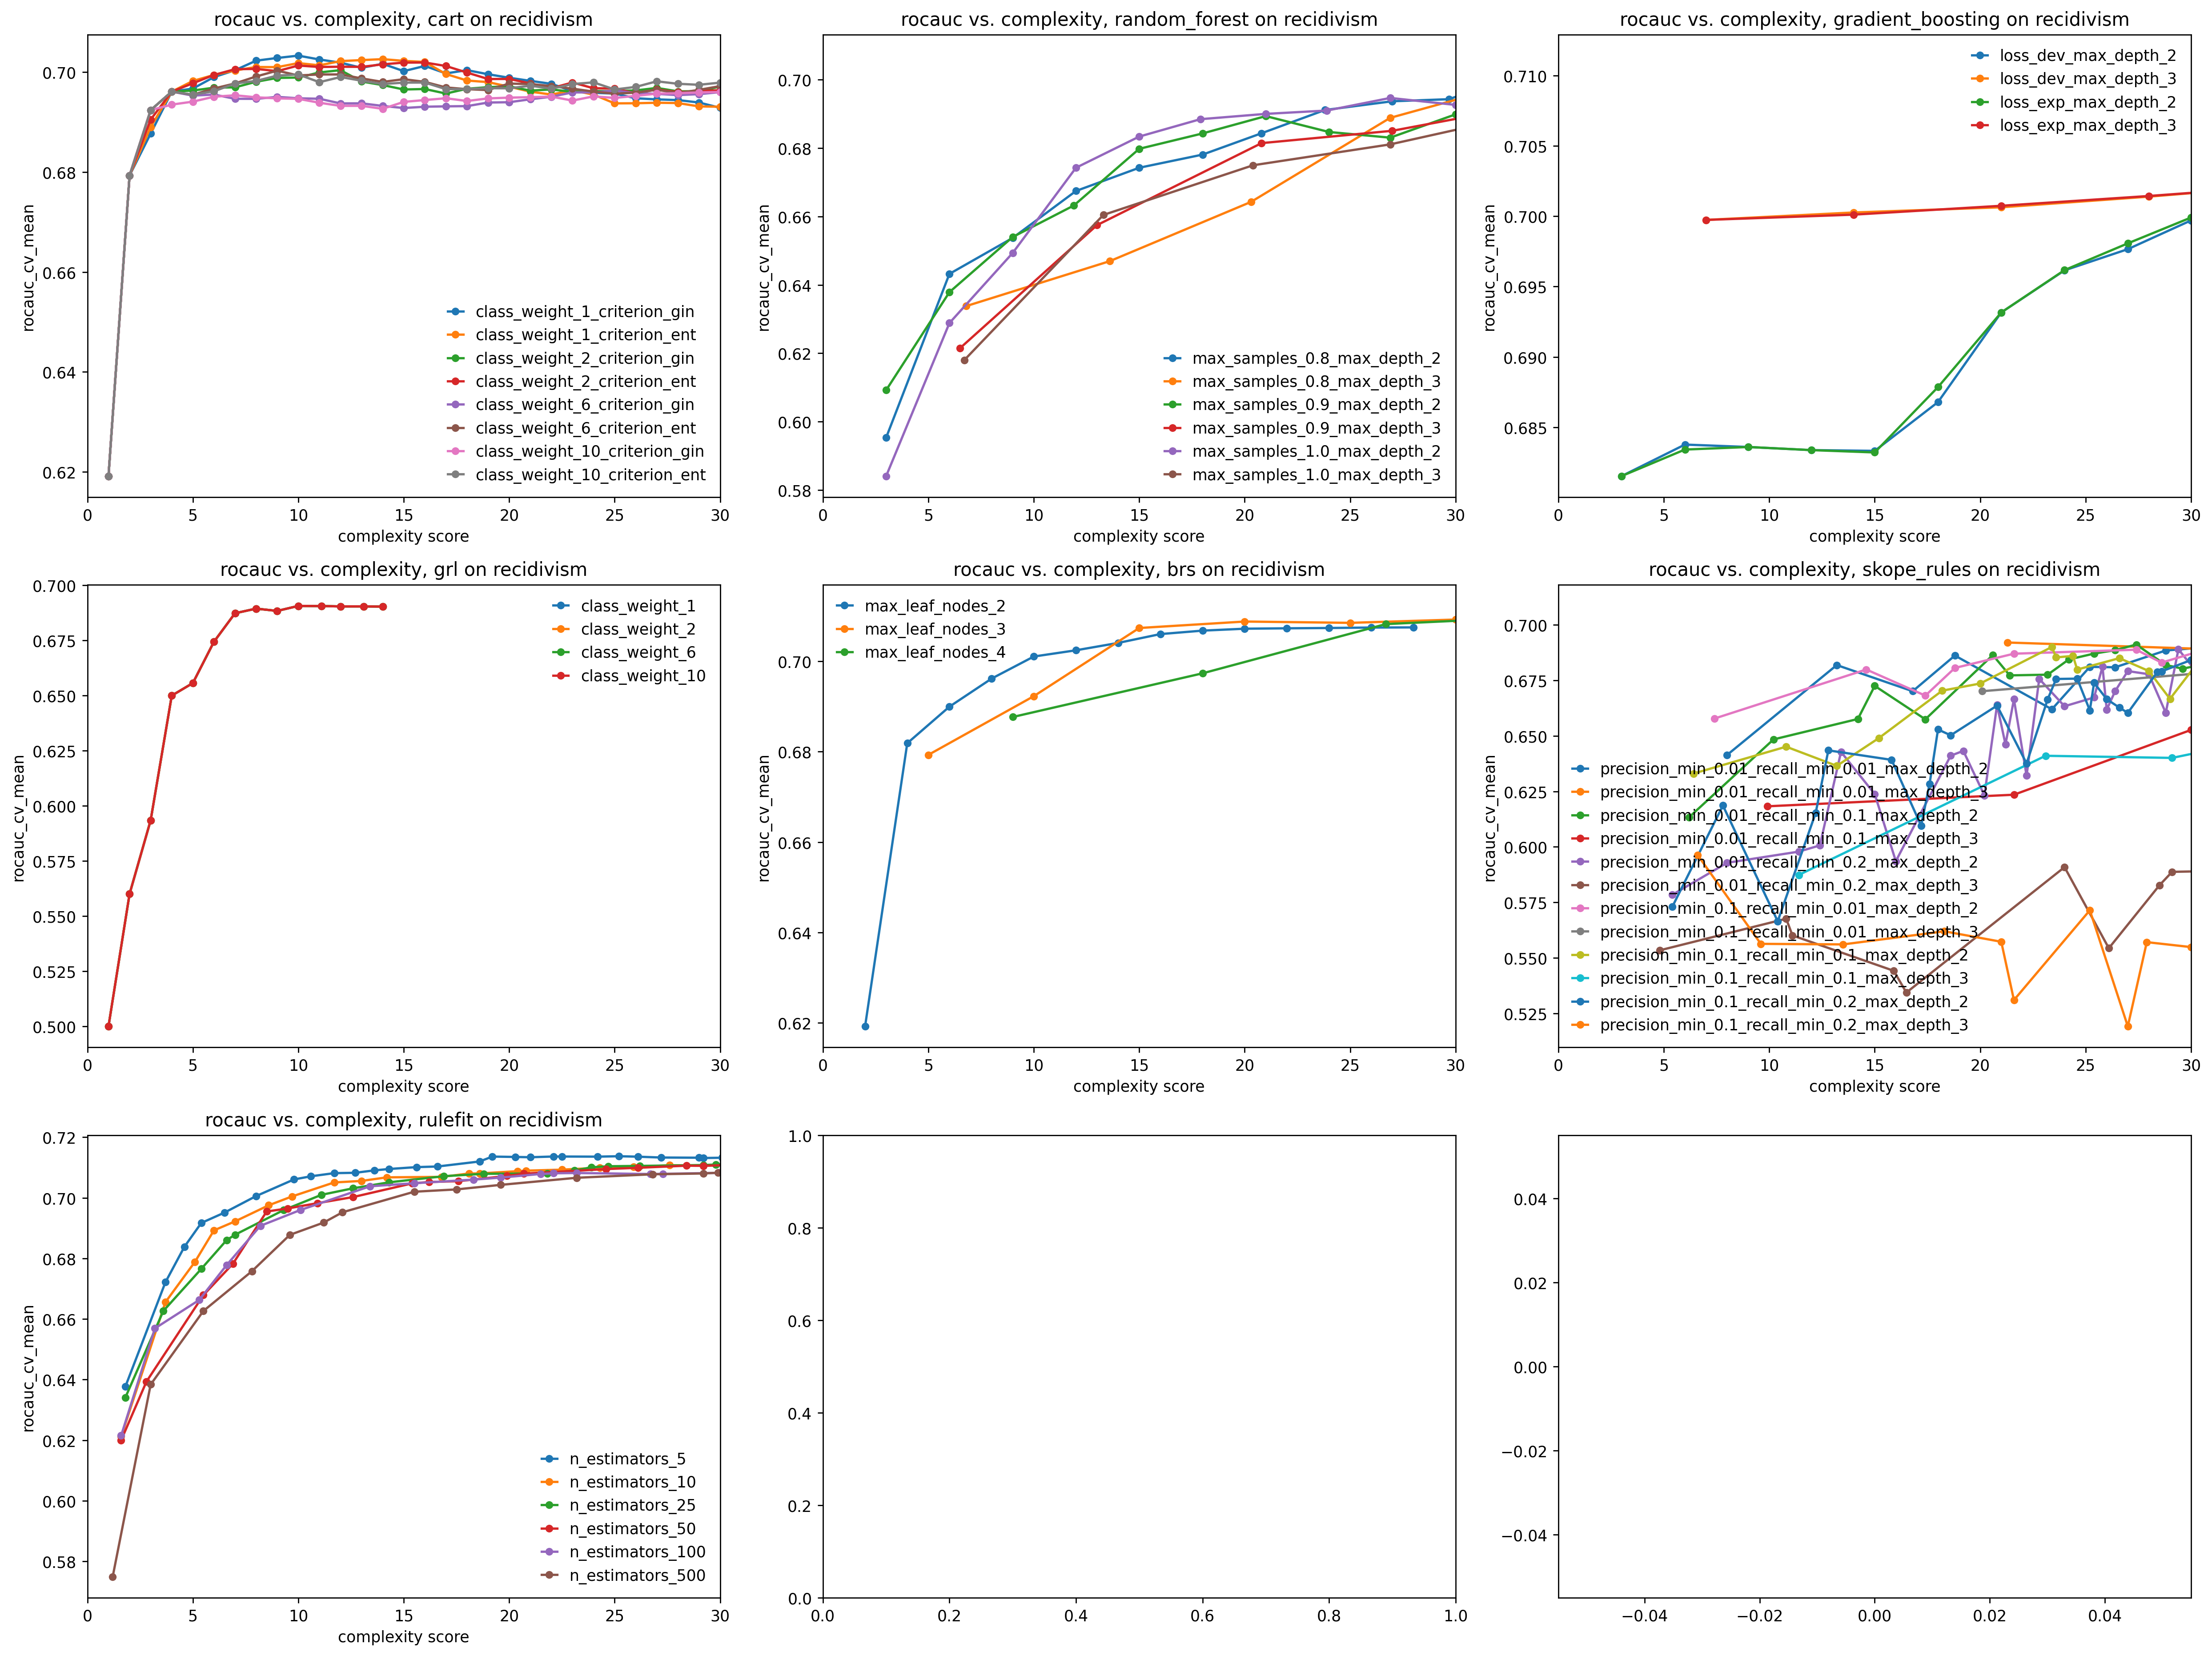

In [35]:
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
for i, result in enumerate(results_to_plot):
    viz.viz_model_curves_validation(
        ax=axes[i // n_cols, i % n_cols], result=result, suffix='cv_mean', metric='rocauc')
plt.plot()
plt.tight_layout()

In [36]:
model_to_best = {
    'cart': 'class_weight_1_criterion_gin',
    'random_forest': 'max_samples_1.0_max_depth_2',
    'gradient_boosting': 'loss_dev_max_depth_2',
    'rulefit': 'n_estimators_5',
    'grl': 'class_weight_1',
    'brs': 'max_leaf_nodes_2',
    'skope_rules': 'precision_min_0.1_recall_min_0.01_max_depth_2',
#     'stbl_l1': 'mc_40_min_mult_2',
#     'stbl_l2': 'mc_40_min_mult_2'
}

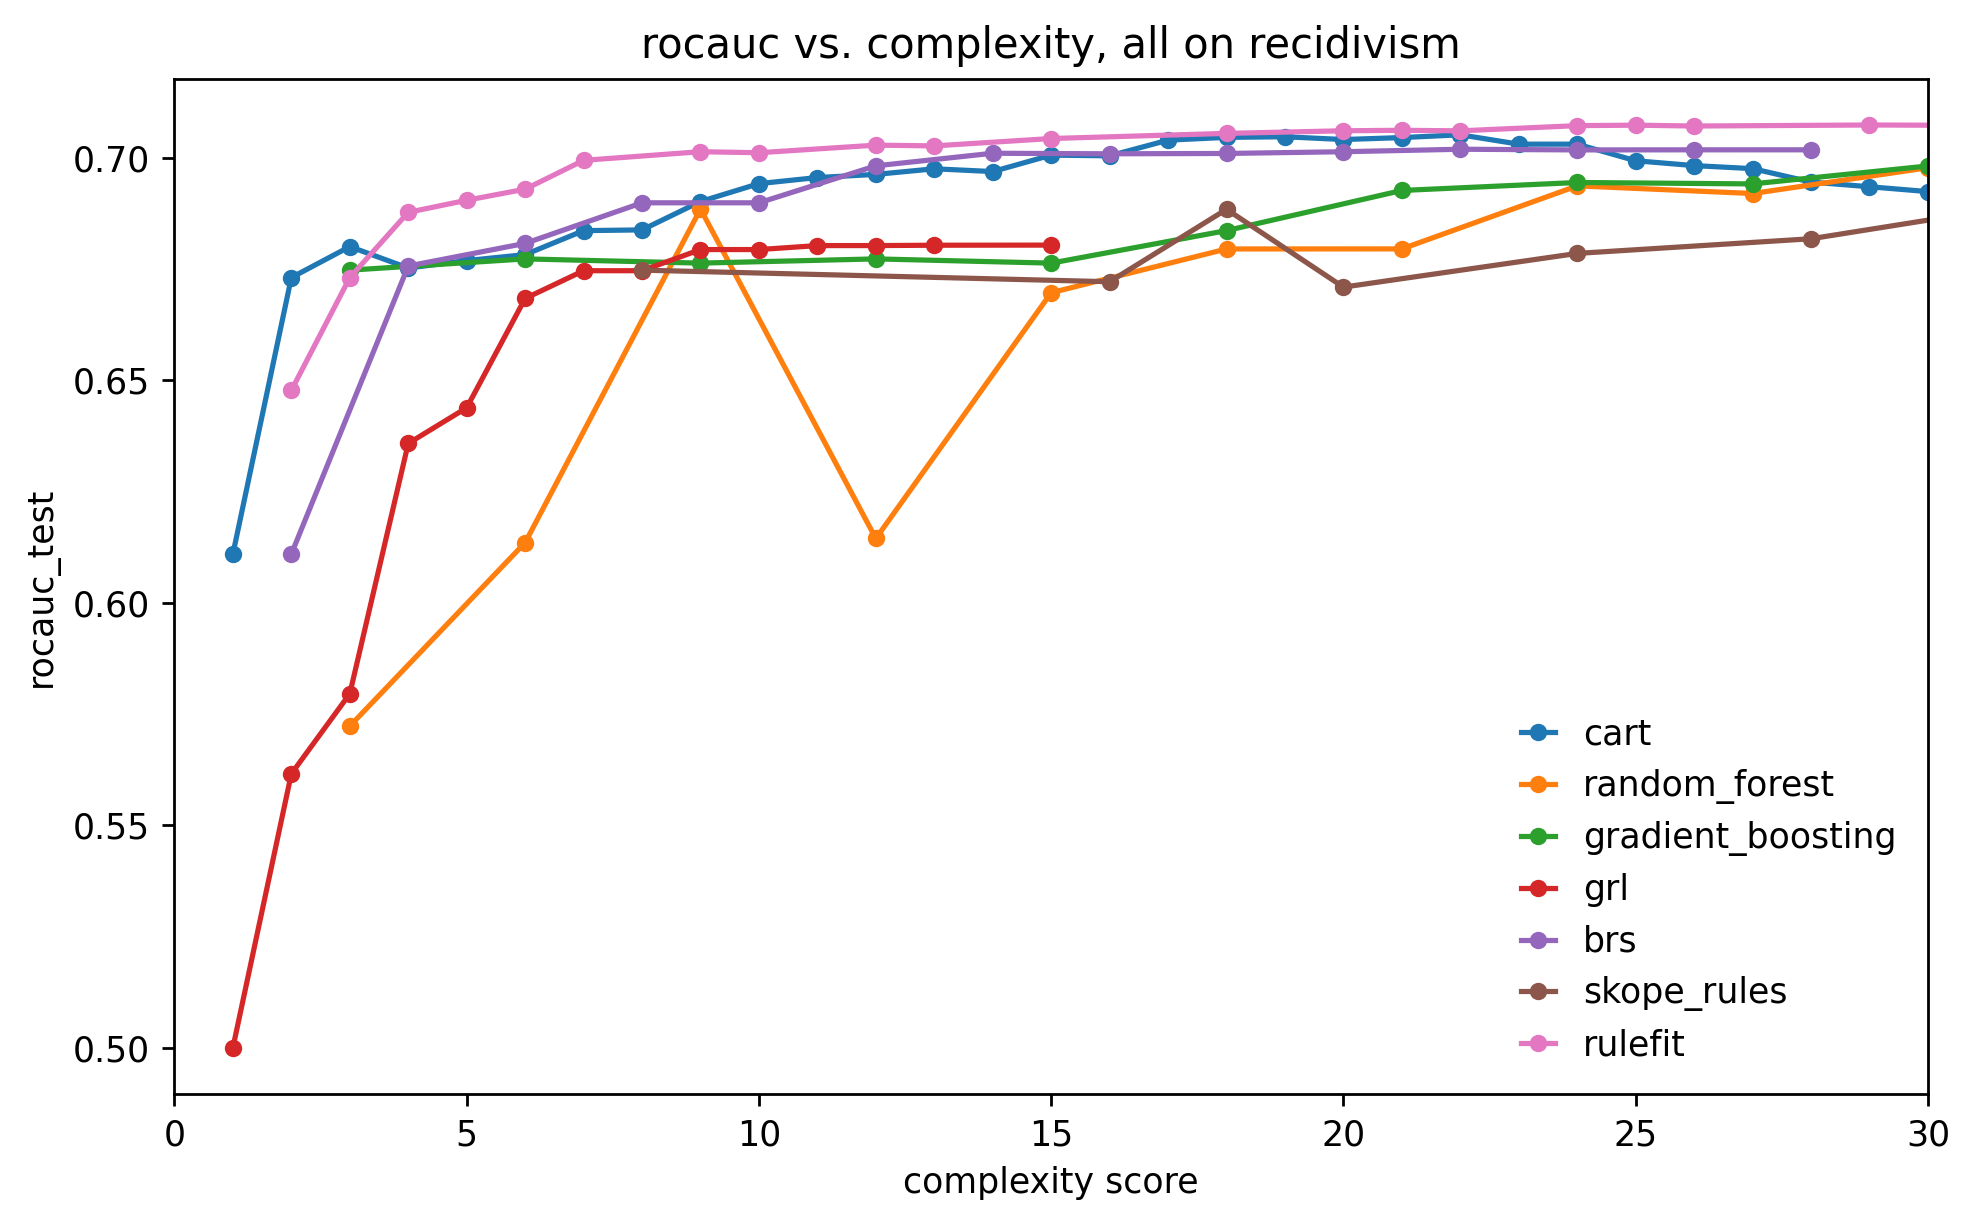

In [38]:
# n_rows, n_cols = 3, 3
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
for i, result in enumerate(results_to_plot):
    viz.viz_model_curves_validation(
        ax=ax, result=result, curve_id=model_to_best[models_to_plot[i]],
        suffix='test', metric='rocauc')
ax.legend(frameon=False, handlelength=1)
plt.plot()
plt.tight_layout()

### avg_precision_score

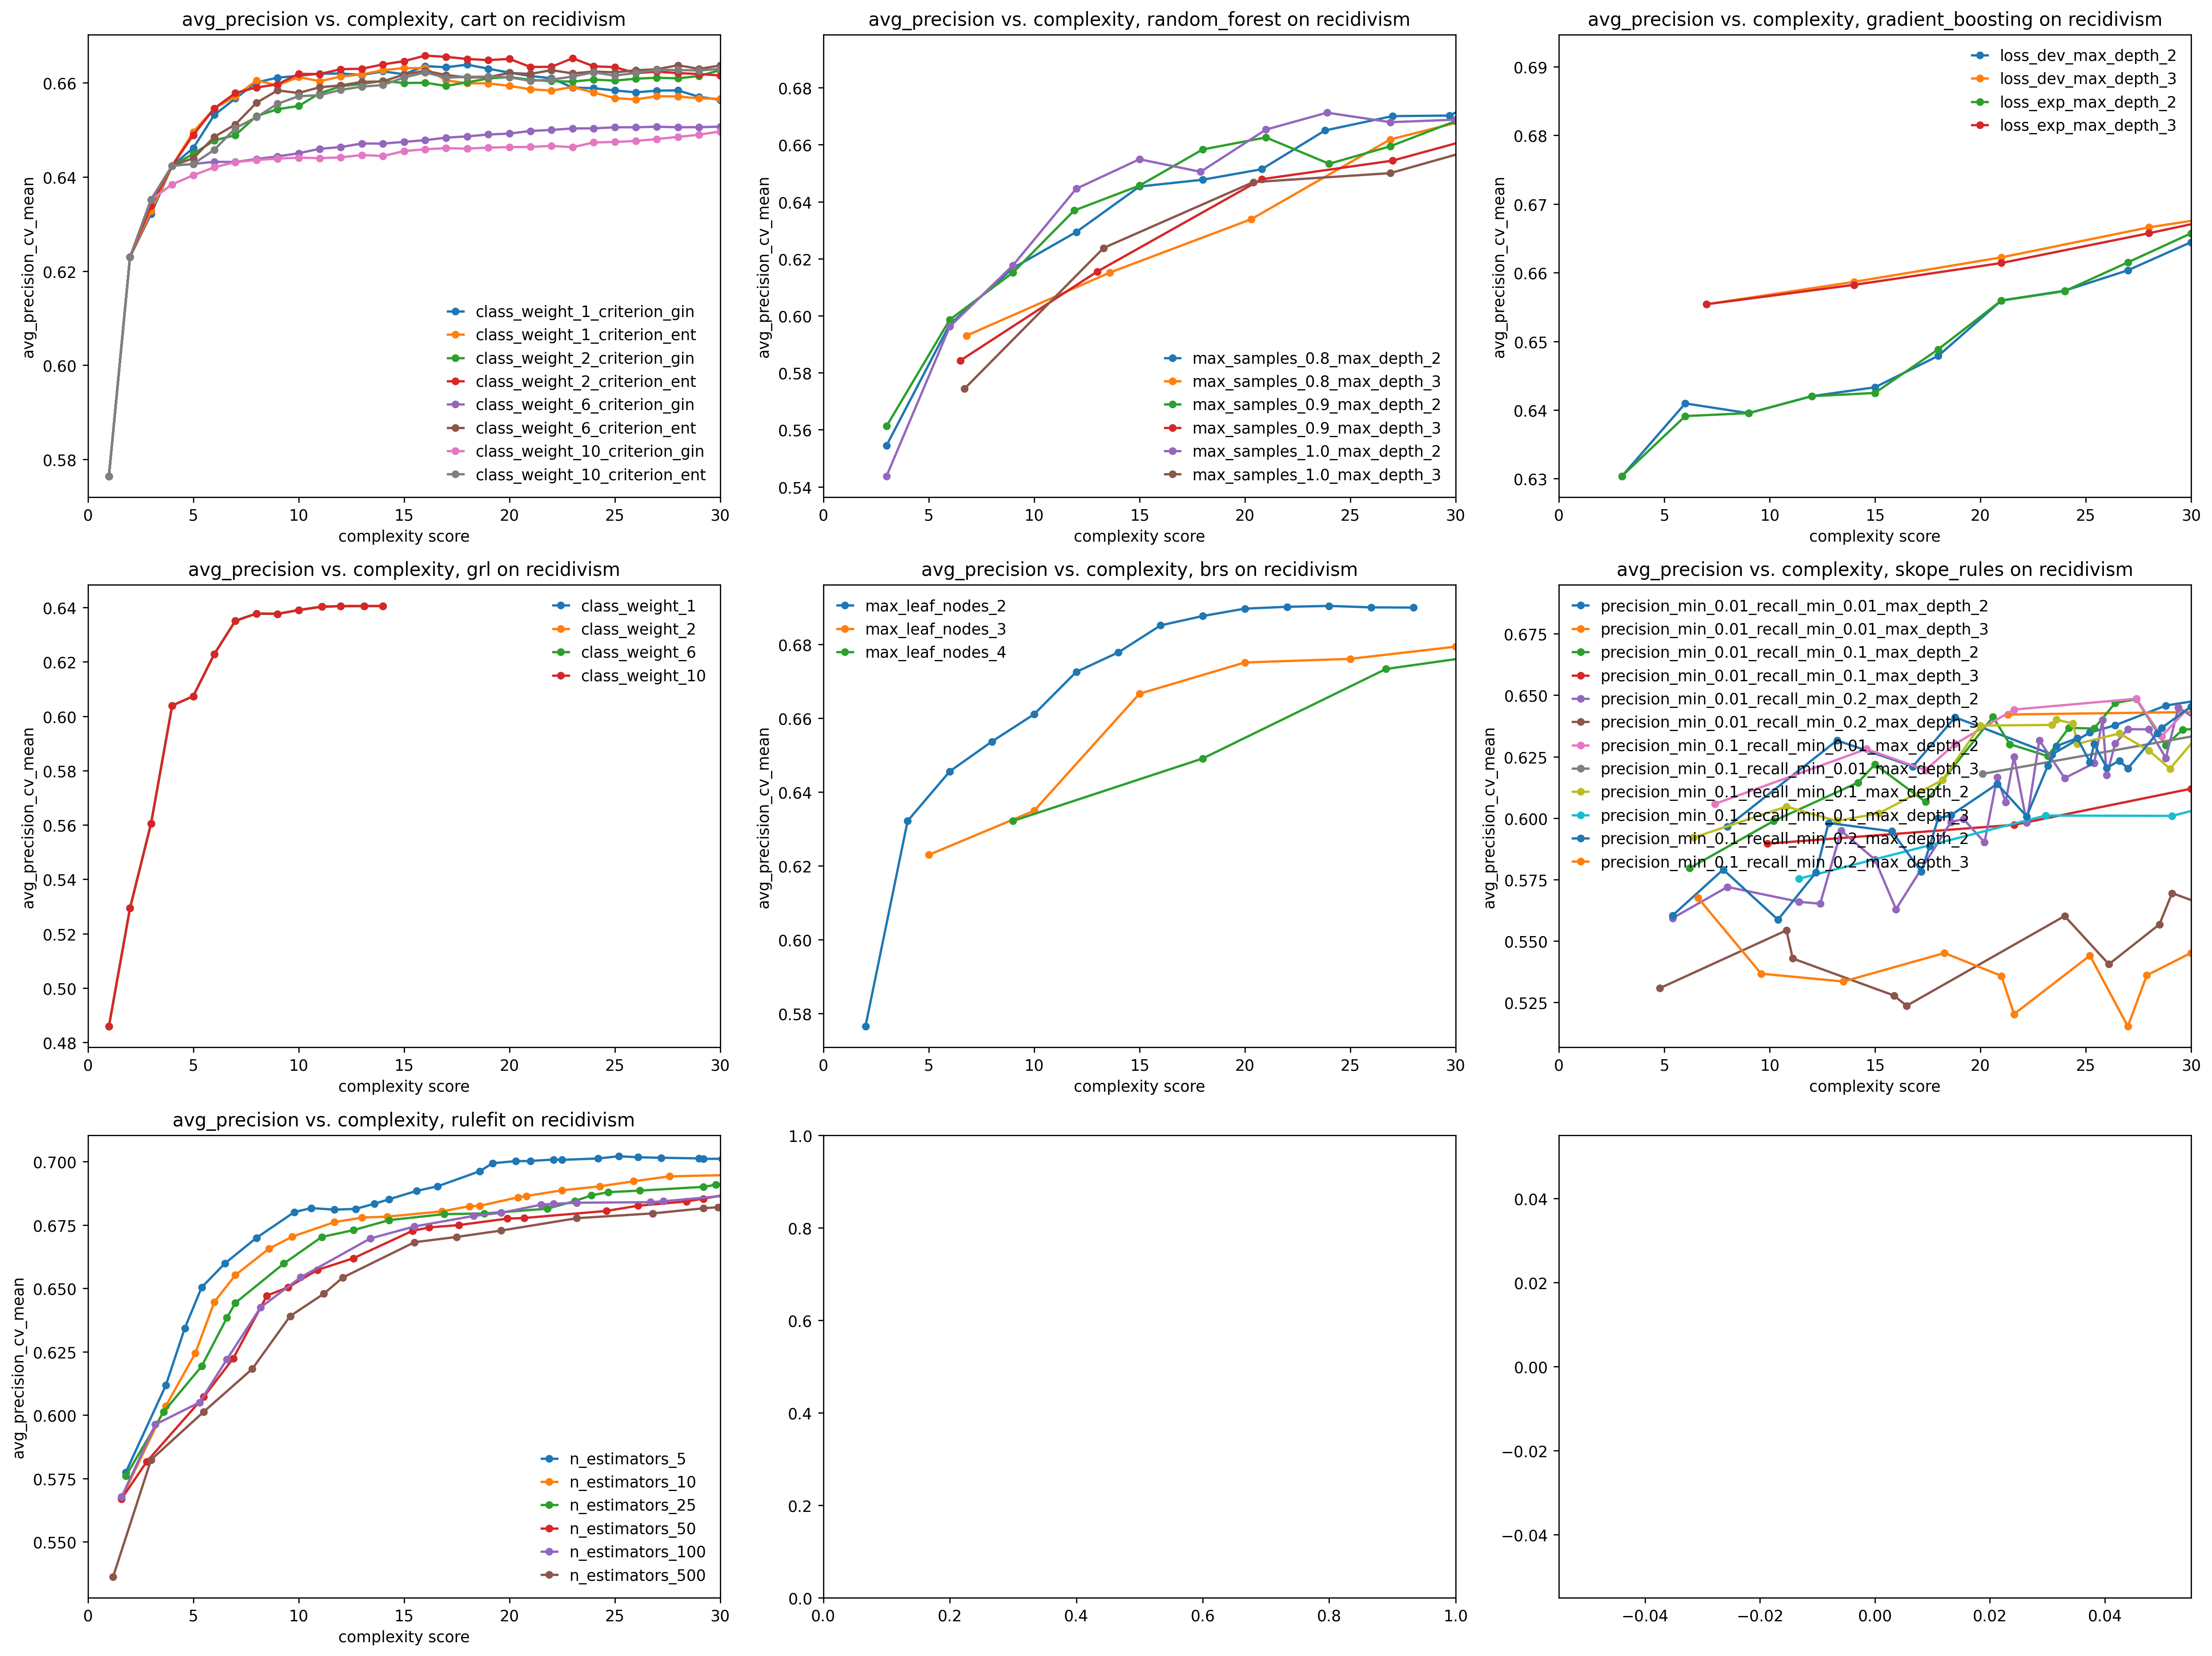

In [39]:
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
for i, result in enumerate(results_to_plot):
    viz.viz_model_curves_validation(
        ax=axes[i // n_cols, i % n_cols], result=result, suffix='cv_mean', metric='avg_precision')
plt.plot()
plt.tight_layout()

In [43]:
model_to_best = {
    'cart': 'class_weight_2_criterion_ent',
    'random_forest': 'max_samples_1.0_max_depth_2',
    'gradient_boosting': 'loss_dev_max_depth_2',
    'rulefit': 'n_estimators_5',
    'grl': 'class_weight_1',
    'brs': 'max_leaf_nodes_2',
    'skope_rules': 'precision_min_0.1_recall_min_0.01_max_depth_2',
#     'stbl_l1': 'mc_40_min_mult_2',
#     'stbl_l2': 'mc_40_min_mult_2'
}

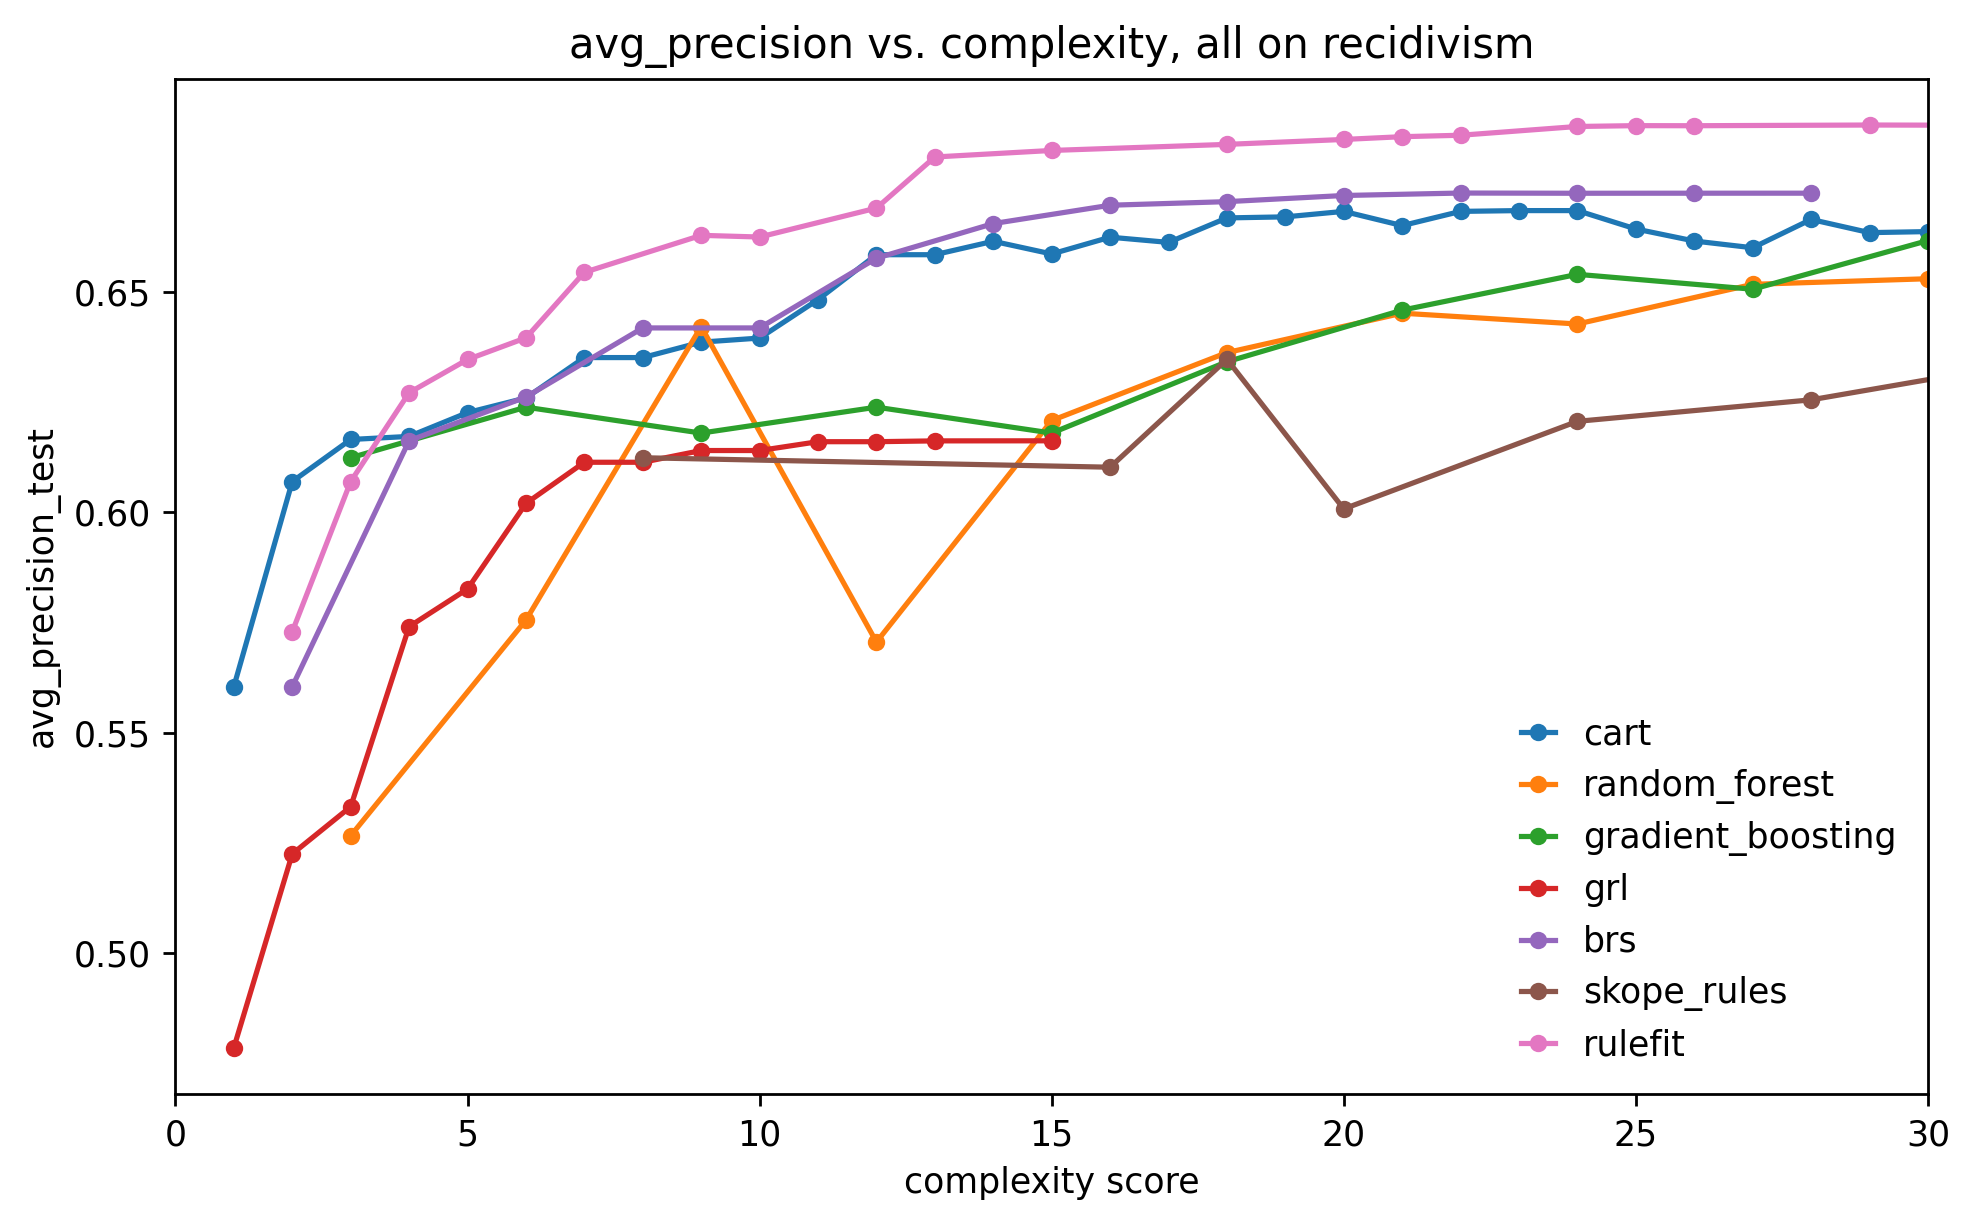

In [44]:
# n_rows, n_cols = 3, 3
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
for i, result in enumerate(results_to_plot):
    viz.viz_model_curves_validation(
        ax=ax, result=result, curve_id=model_to_best[models_to_plot[i]],
        suffix='test', metric='avg_precision')
ax.legend(frameon=False, handlelength=1)
plt.plot()
plt.tight_layout()

### best spec over 0.95 sens

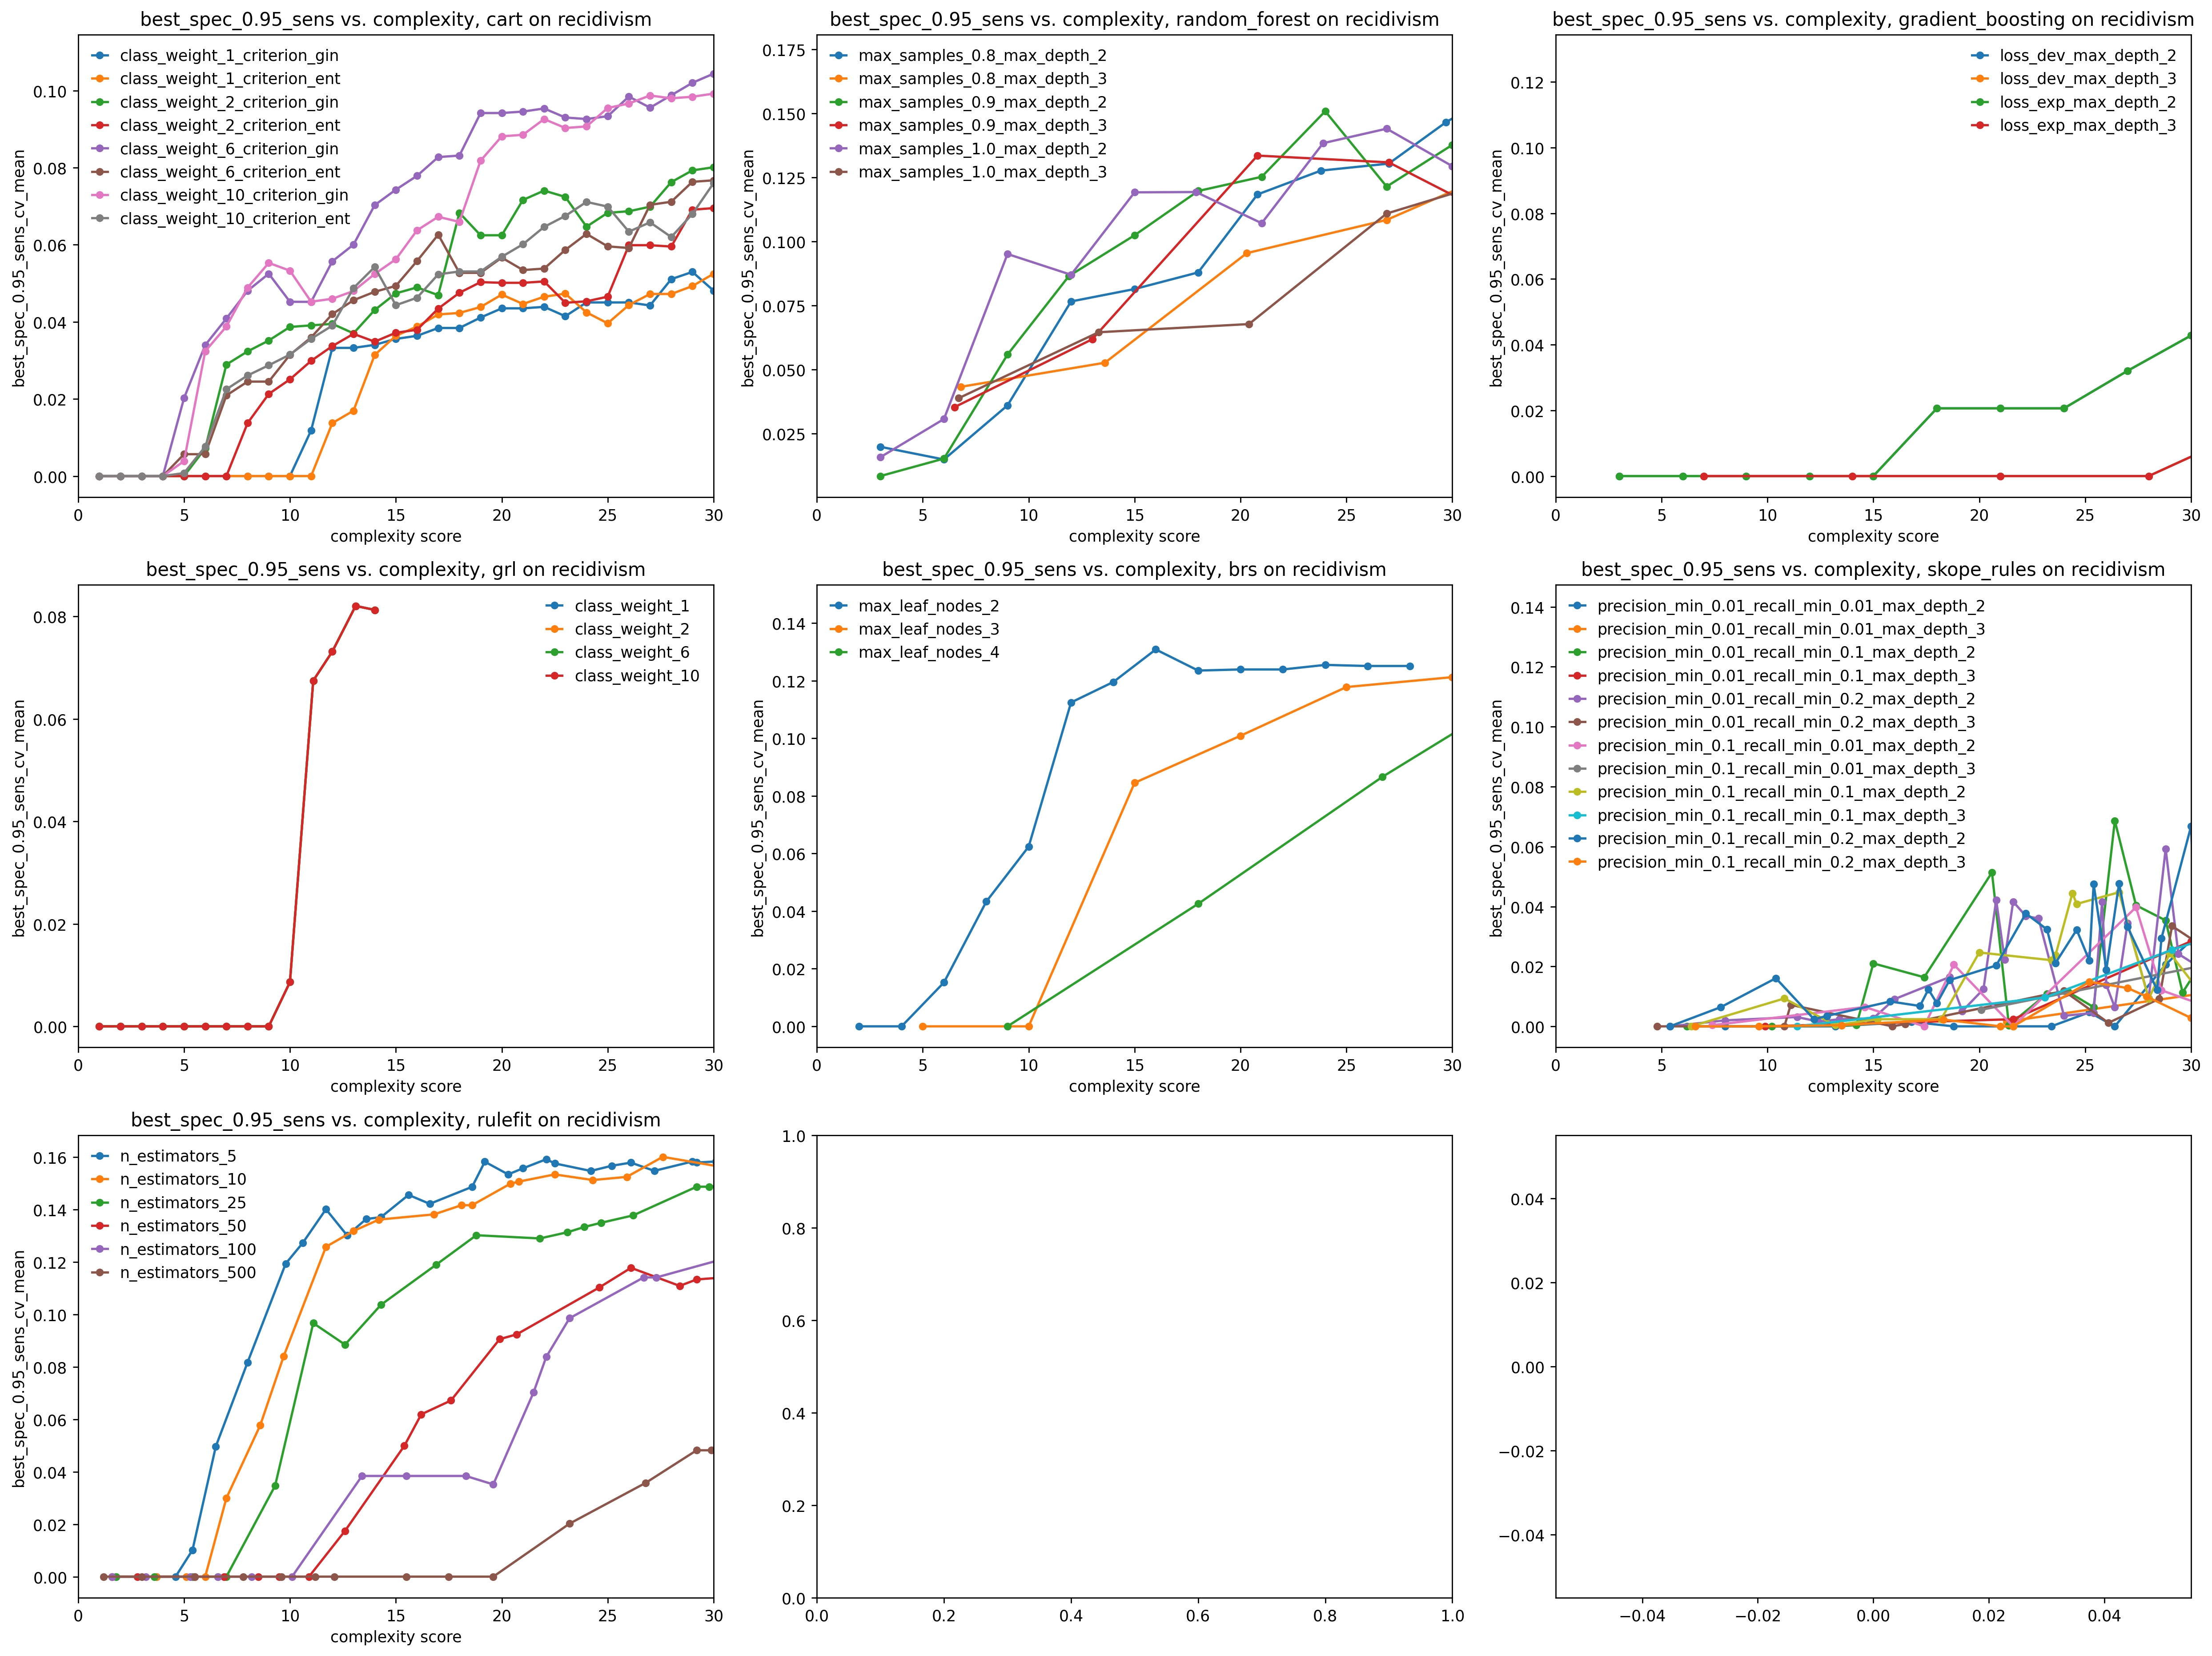

In [45]:
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
for i, result in enumerate(results_to_plot):
    viz.viz_model_curves_validation(
        ax=axes[i // n_cols, i % n_cols], result=result, suffix='cv_mean', metric='best_spec_0.95_sens')
plt.plot()
plt.tight_layout()

In [46]:
model_to_best = {
    'cart': 'class_weight_6_criterion_gin',
    'random_forest': 'max_samples_1.0_max_depth_2',
    'gradient_boosting': 'loss_dev_max_depth_2',
    'rulefit': 'n_estimators_5',
    'grl': 'class_weight_1',
    'brs': 'max_leaf_nodes_2',
    'skope_rules': 'precision_min_0.01_recall_min_0.1_max_depth_2',
#     'stbl_l1': 'mc_40_min_mult_2',
#     'stbl_l2': 'mc_40_min_mult_2'
}

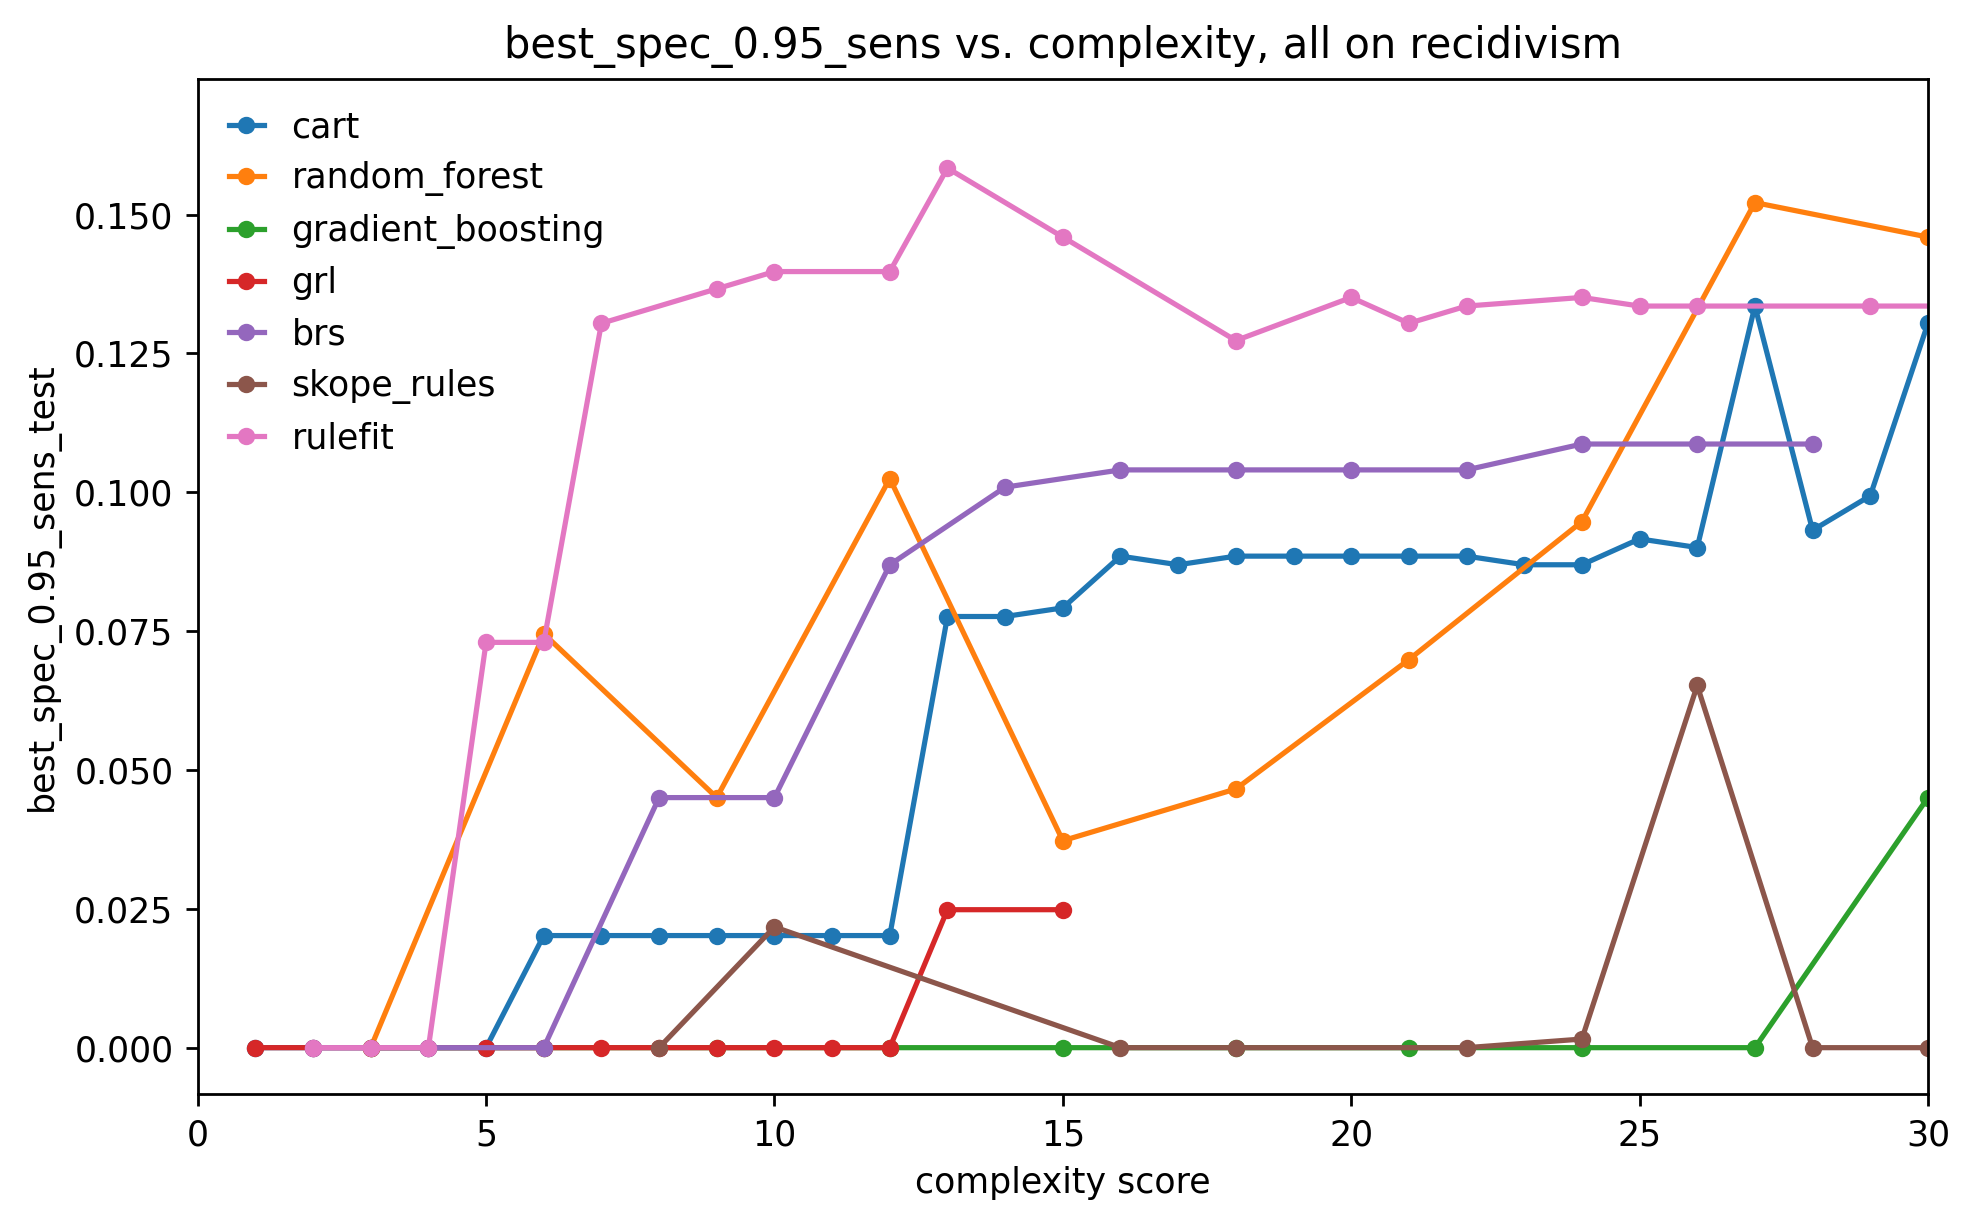

In [47]:
# n_rows, n_cols = 3, 3
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
for i, result in enumerate(results_to_plot):
    viz.viz_model_curves_validation(
        ax=ax, result=result, curve_id=model_to_best[models_to_plot[i]],
        suffix='test', metric='best_spec_0.95_sens')
ax.legend(frameon=False, handlelength=1)
plt.plot()
plt.tight_layout()

In [33]:
def print_best_params_for_model(model_name: str):
    fname = f'results/stablerules/recidivism/cv/{model_name}_comparisons.pkl'
    df = pkl.load(open(fname, 'rb'))['df']
    best_idx = df[df['complexity_train'] < 25]['avg_precision_test'].argmax()
    print(df.columns[0], df.iloc[best_idx, 0])
    if 'other_kwargs' in df.columns:
        print(df.iloc[best_idx]['other_kwargs'])
    # return df.iloc[best_idx]['vars_train']

In [7]:
# print_best_params_for_model('rulefit')

In [8]:
# print_best_params_for_model('grl')

In [9]:
# print_best_params_for_model('random_forest')

In [10]:
# print_best_params_for_model('grl')

In [11]:
# print_best_params_for_model('brs')

In [12]:
# print_best_params_for_model('stbl_l1')

In [13]:
# print_best_params_for_model('stbl_l2')